In [1]:
import scvelo as scv
from lets_plot import *
import polars as pl

LetsPlot.setup_html()

In [2]:
adata = scv.datasets.pancreas()

100%|██████████| 50.0M/50.0M [00:13<00:00, 3.79MB/s]


In [3]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 20801 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


C:\Users\zafi_\AppData\Local\Temp\ipykernel_12812\2236818986.py:4: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata)


Filtered out 55 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
computing neighbors


c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
C:\Users\zafi_\AppData\Local\Temp\ipykernel_12812\2236818986.py:6: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\preprocessing\moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:38) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [4]:
scv.tl.velocity(adata)

computing velocities


c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [5]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/8 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:30) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [6]:
scv.tools.velocity_embedding(adata, basis="umap")

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


In [92]:
frame = (
    pl.from_numpy(adata.obsm["velocity_umap"], schema=["vel1", "vel2"])
    .with_columns(pl.from_numpy(adata.obsm["X_umap"], schema=["umap1", "umap2"]))
    .with_columns(pl.Series(adata.obs["clusters"]))
)

In [93]:
frame = frame.with_columns(
    pl.col("vel1").add(pl.col("umap1")).alias("xend"),
    pl.col("vel2").add(pl.col("umap2")).alias("yend"),
)
frame

vel1,vel2,umap1,umap2,clusters,xend,yend
f64,f64,f32,f32,cat,f64,f64
-0.021021,0.053618,6.143066,-0.063644,"""Pre-endocrine""",6.122045,-0.010026
-0.029884,-0.044597,-9.906417,0.197778,"""Ductal""",-9.936301,0.15318
0.003657,0.021857,7.559791,0.583762,"""Alpha""",7.563449,0.605619
-0.019717,0.051285,-11.283765,4.218998,"""Ductal""",-11.303482,4.270283
0.11154,0.004786,1.721565,-4.753407,"""Ngn3 high EP""",1.833104,-4.748622
…,…,…,…,…,…,…
0.049372,0.062256,4.768472,-1.388353,"""Pre-endocrine""",4.817844,-1.326097
0.08386,-0.012661,-1.873335,-4.18265,"""Ngn3 high EP""",-1.789475,-4.195312
-0.026134,-0.017431,-9.88225,-0.105594,"""Ductal""",-9.908384,-0.123025


In [94]:
base = (
    ggplot(frame)
    + geom_point(aes(x="umap1", y="umap2", color="clusters"), alpha=0.4)
    + scale_color_viridis(option="plasma")
    + ggsize(600, 400)
    + theme_void()
)
base

In [98]:
base + geom_curve(
    aes("umap1", "umap2", xend="xend", yend="yend"),
    curvature=0.5,
    size=0.5,
    color="black",
    arrow=arrow(angle=20),
    # sampling=sampling_random(1000),
    ncp=100,
)+ggsize(1200,800)

In [29]:
frame.schema

Schema([('vel1', Float64),
        ('vel2', Float64),
        ('umap1', Float32),
        ('umap2', Float32),
        ('clusters', Categorical(ordering='physical')),
        ('xend', Float64),
        ('yend', Float64)])

In [100]:
# Compute angles and magnitudes using NumPy
angles = np.arctan2(frame["vel2"].to_numpy(), frame["vel1"].to_numpy())
magnitudes = np.sqrt(frame["vel1"].to_numpy()**2 + frame["vel2"].to_numpy()**2)

# Add back to the DataFrame
frame = frame.with_columns(
    pl.Series("angle", angles),
    pl.Series("magnitude", magnitudes)
)

# Bin angles to group similar directions
angle_bin_size = np.pi / 2  # Adjust bin size as needed
frame = frame.with_columns(
    (pl.col("angle") / angle_bin_size).floor().alias("angle_bin")
)

# Group by spatial bins
spatial_bin_size = 1  # Adjust for better merging
frame = frame.with_columns(
    (pl.col("umap1") / spatial_bin_size).floor().alias("x_bin"),
    (pl.col("umap2") / spatial_bin_size).floor().alias("y_bin")
)

In [101]:
merged = (
    frame.group_by(["angle_bin", "x_bin", "y_bin"])
    .agg(
        pl.col("umap1").mean().alias("umap1"),  # Weighted centroid
        pl.col("umap2").mean().alias("umap2"),
        pl.col("vel1").sum().alias("vel1_sum"),  # Summing velocities instead of averaging
        pl.col("vel2").sum().alias("vel2_sum")
    )
    .with_columns(
        (pl.col("umap1") + pl.col("vel1_sum")).alias("xend"),  # Use integrated displacement
        (pl.col("umap2") + pl.col("vel2_sum")).alias("yend")
    )
)


In [102]:
merged

angle_bin,x_bin,y_bin,umap1,umap2,vel1_sum,vel2_sum,xend,yend
f64,f32,f32,f32,f32,f64,f64,f64,f64
-1.0,0.0,-4.0,0.321334,-3.888684,0.580762,-0.029172,0.902097,-3.917856
0.0,-11.0,6.0,-10.709433,6.18023,0.847905,0.153925,-9.861527,6.334156
-1.0,-12.0,-1.0,-11.270629,-0.45216,0.106255,-0.228948,-11.164374,-0.681108
0.0,3.0,-1.0,3.671758,-0.721476,0.373027,0.223316,4.044785,-0.49816
1.0,2.0,6.0,2.64405,6.157403,-0.418167,0.117705,2.225882,6.275108
…,…,…,…,…,…,…,…,…
-1.0,-9.0,3.0,-8.237833,3.444331,0.633735,-2.37883,-7.604098,1.065501
-1.0,7.0,4.0,7.618032,4.782102,0.052784,-0.011565,7.670817,4.770538
1.0,4.0,1.0,4.674728,1.611678,-0.37427,1.038236,4.300459,2.649913


In [103]:

base + geom_curve(
    data=merged,
    mapping=aes("umap1", "umap2", xend="xend", yend="yend"),
    curvature=0,
    size=0.5,
    color="black",
    arrow=arrow(angle=10, type="closed"),
    sampling=sampling_random(1000),
    ncp=10
)


c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\plotting\utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
c:\Users\zafi_\packages\cellestial\.venv\Lib\site-packages\scvelo\plottin

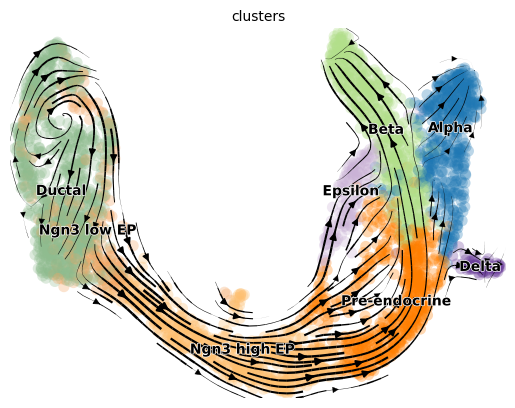

In [104]:
scv.pl.velocity_embedding_stream(adata)

In [105]:
adata

AnnData object with n_obs × n_vars = 3696 × 1945
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable_genes', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'log1p', 'velocity_params', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'
    obsp: 'distances', 'connectivities'

In [106]:
import cellestial as cl
cl.umap(adata,key="clusters", size=1,legend_ondata=True,ondata_size=10,axis_type="arrow")

In [ ]:
geom_segment